# chp6 challenge & solution

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
oo = pd.read_csv('data/olympics.csv',skiprows=4)
oo.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [3]:
noc = pd.read_csv('data/Summer Olympic medallists 1896 to 2008 - IOC COUNTRY CODES.csv')
noc.head()

,Country,Int Olympic Committee code,ISO code,Country.1
0,Afghanistan,AFG,AF,Afghanistan
1,Albania,ALB,AL,Albania
2,Algeria,ALG,DZ,Algeria
3,American Samoa*,ASA,AS,American Samoa*
4,Andorra,AND,AD,Andorra


### Plot the total number of medals awarded at each of the Olympic games throughout history.

In [4]:
oo.Edition.value_counts()

2008    2042
2000    2015
2004    1998
1996    1859
1992    1705
1988    1546
1984    1459
1980    1387
1976    1305
1920    1298
1972    1185
1968    1031
1964    1010
1952     889
1912     885
1956     885
1924     884
1960     882
1936     875
1948     814
1908     804
1928     710
1932     615
1900     512
1904     470
1896     151
Name: Edition, dtype: int64

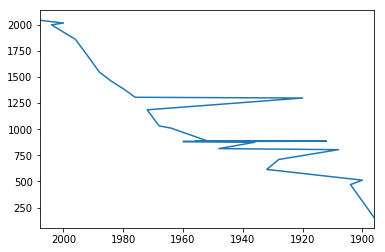

In [5]:
oo.Edition.value_counts().plot();

In [6]:
type(oo.Edition.value_counts())

pandas.core.series.Series

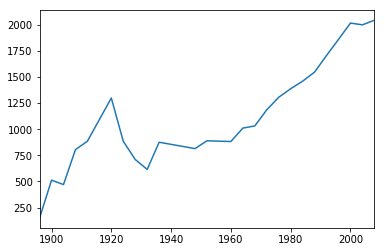

In [7]:
oo.Edition.value_counts().sort_index().plot()

### Which countries did not win a medal in the 2008 Olympics? How many countries were there?

In [8]:
bj = oo[oo.Edition==2008]
bj.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
27174,Beijing,2008,Aquatics,Diving,"GALPERIN, Gleb",RUS,Men,10m platform,M,Bronze
27175,Beijing,2008,Aquatics,Diving,"MITCHAM, Matthew",AUS,Men,10m platform,M,Gold
27176,Beijing,2008,Aquatics,Diving,"ZHOU, Luxin",CHN,Men,10m platform,M,Silver
27177,Beijing,2008,Aquatics,Diving,"WANG, Xin",CHN,Women,10m platform,W,Bronze
27178,Beijing,2008,Aquatics,Diving,"CHEN, Ruolin",CHN,Women,10m platform,W,Gold


In [10]:
noc.head()

,Country,Int Olympic Committee code,ISO code,Country.1
0,Afghanistan,AFG,AF,Afghanistan
1,Albania,ALB,AL,Albania
2,Algeria,ALG,DZ,Algeria
3,American Samoa*,ASA,AS,American Samoa*
4,Andorra,AND,AD,Andorra


In [11]:
noc[noc['Country']!= noc['Country.1']]

,Country,Int Olympic Committee code,ISO code,Country.1


In [12]:
del noc['Country.1']

In [13]:
noc.head()

,Country,Int Olympic Committee code,ISO code
0,Afghanistan,AFG,AF
1,Albania,ALB,AL
2,Algeria,ALG,DZ
3,American Samoa*,ASA,AS
4,Andorra,AND,AD


In [14]:
noc.set_index('Int Olympic Committee code',inplace=True)
noc.head()

,Country,ISO code
Int Olympic Committee code,,
AFG,Afghanistan,AF
ALB,Albania,AL
ALG,Algeria,DZ
ASA,American Samoa*,AS
AND,Andorra,AD


In [15]:
medal_2008 = bj.NOC.value_counts()
medal_2008

USA    315
CHN    184
AUS    149
RUS    143
GER    101
KOR     78
GBR     77
FRA     76
BRA     75
ESP     71
NED     62
ARG     51
JPN     51
CUB     47
ITA     42
CAN     34
UKR     31
BLR     30
HUN     27
NGR     24
ROU     22
NOR     22
POL     20
DEN     18
JAM     17
SRB     15
KEN     14
NZL     14
ISL     14
KAZ     13
      ... 
SIN      3
EST      3
IND      3
AUT      3
IRL      3
LAT      3
POR      2
TJK      2
IRI      2
KGZ      2
MAR      2
COL      2
ALG      2
DOM      2
TUN      1
ISR      1
TOG      1
MDA      1
ECU      1
PAN      1
VEN      1
CMR      1
AFG      1
EGY      1
RSA      1
MRI      1
VIE      1
CHI      1
SUD      1
MAS      1
Name: NOC, Length: 86, dtype: int64

In [16]:
noc['medal_2008'] = medal_2008
noc.head()

,Country,ISO code,medal_2008
Int Olympic Committee code,,,
AFG,Afghanistan,AF,1.0
ALB,Albania,AL,NaN
ALG,Algeria,DZ,2.0
ASA,American Samoa*,AS,NaN
AND,Andorra,AD,NaN


In [19]:
no_medal = noc[noc.medal_2008.isnull()]
no_medal.head()

,Country,ISO code,medal_2008
Int Olympic Committee code,,,
ALB,Albania,AL,NaN
ASA,American Samoa*,AS,NaN
AND,Andorra,AD,NaN
ANG,Angola,AO,NaN
ANT,Antigua and Barbuda,AG,NaN


In [20]:
no_medal.size

351

In [21]:
no_medal

,Country,ISO code,medal_2008
Int Olympic Committee code,,,
ALB,Albania,AL,NaN
ASA,American Samoa*,AS,NaN
AND,Andorra,AD,NaN
ANG,Angola,AO,NaN
ANT,Antigua and Barbuda,AG,NaN
ARU,Aruba*,AW,NaN
BRN,Bahrain,BH,NaN
BAN,Bangladesh,BD,NaN
BAR,Barbados,BB,NaN


In [23]:
len(no_medal.index)

117

In [ ]:
pd.read_csv